In [1]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras import layers
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import numpy as np
import glob
import matplotlib.image
from tensorflow.keras.preprocessing.image import load_img
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [2]:
data = np.load("/home/lusk.c/XN_project/data_pretrained.npy")
y = np.load("/home/lusk.c/XN_project/y_pretrained.npy")

In [60]:
x_train, x_valid, y_train, y_valid = train_test_split(data, y, test_size=0.1, random_state=0)

In [61]:
y_train = np_utils.to_categorical(y_train, 7)
y_valid = np_utils.to_categorical(y_valid, 7)

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
from PIL import Image
from PIL import ImageFilter
import matplotlib.pyplot as plt
import numpy as np 
import glob
import pandas as pd
import time
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from PIL import Image, ImageEnhance
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.callbacks import LearningRateScheduler
from keras.metrics import top_k_categorical_accuracy
from tensorflow.keras.layers import Dense, AveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

In [8]:
def lr_scheduler(epoch):
    if epoch < 4:
        return 0.001
    elif epoch < 9:
        return .0001
    elif epoch < 16:
        return 0.00001
    else:
        return .0000001
scheduler = LearningRateScheduler(lr_scheduler)

from tensorflow.keras.applications.densenet import DenseNet201

base_model = DenseNet201(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

import functools
top3_acc = functools.partial(top_k_categorical_accuracy, k=3)
top3_acc.__name__ = 'top3_acc'

x = base_model.output
x = AveragePooling2D()(x)
x = Dropout(.5)(x)
x = Flatten()(x)
predictions = Dense(7, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
#for layer in base_model.layers:
 #   layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(SGD(learning_rate=0.001, momentum=.9), loss='categorical_crossentropy', metrics = ["accuracy", top3_acc])

In [9]:
hist = model.fit(x_train,y_train, epochs = 6, validation_data = (x_valid,y_valid), workers=8, callbacks=[scheduler])

Epoch 1/6
1933/1933 [==============================] - 13202s 7s/step - loss: 1.4355 - accuracy: 0.4640 - top3_acc: 0.8124 - val_loss: 1.1679 - val_accuracy: 0.5533 - val_top3_acc: 0.8728 - lr: 0.0010
Epoch 2/6
1933/1933 [==============================] - 13002s 7s/step - loss: 0.9985 - accuracy: 0.6294 - top3_acc: 0.9090 - val_loss: 0.9995 - val_accuracy: 0.6149 - val_top3_acc: 0.9073 - lr: 0.0010
Epoch 3/6
1933/1933 [==============================] - 12993s 7s/step - loss: 0.8360 - accuracy: 0.6948 - top3_acc: 0.9349 - val_loss: 0.8942 - val_accuracy: 0.6755 - val_top3_acc: 0.9281 - lr: 0.0010
Epoch 4/6
1933/1933 [==============================] - 13069s 7s/step - loss: 0.6940 - accuracy: 0.7487 - top3_acc: 0.9525 - val_loss: 0.8429 - val_accuracy: 0.6995 - val_top3_acc: 0.9361 - lr: 0.0010
Epoch 5/6
1933/1933 [==============================] - 12794s 7s/step - loss: 0.3892 - accuracy: 0.8657 - top3_acc: 0.9792 - val_loss: 0.7165 - val_accuracy: 0.7625 - val_top3_acc: 0.9536 - lr: 1.

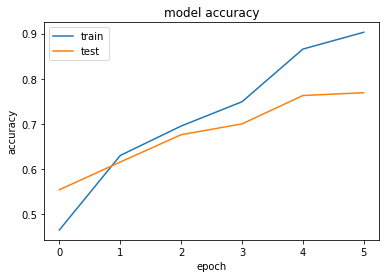

In [10]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
model.save('/home/lusk.c/XN_project/densenet.h5')
